# 4장 넘파이 3편

## 주요 내용

- 어레이 활용: 정렬, 확률과 통계, 선형대수, 난수 생성

## 기본 설정

`numpy` 모듈과 시각화 도구 모듈인 `matplotlib.pyplot`에 대한 기본 설정을 지정한다.

In [1]:
# 넘파이
import numpy as np
# 램덤 시드
np.random.seed(12345)
# 어레이 사용되는 부동소수점들의 정확도 지정
np.set_printoptions(precision=4, suppress=True)

# 파이플롯
import matplotlib.pyplot as plt
# 도표 크기 지정
plt.rc('figure', figsize=(10, 6))

## 4.2 항목별 함수 적용

- 158쪽

In [2]:
arr = np.arange(10)
arr
np.sqrt(arr)
np.exp(arr)

array([   1.    ,    2.7183,    7.3891,   20.0855,   54.5982,  148.4132,
        403.4288, 1096.6332, 2980.958 , 8103.0839])

In [3]:
x = np.random.randn(8)
y = np.random.randn(8)
x
y
np.maximum(x, y)

array([ 0.769 ,  1.2464,  1.0072, -0.5557,  1.9658,  1.3934,  1.3529,
        0.8864])

In [4]:
arr = np.random.randn(7) * 5
arr
remainder, whole_part = np.modf(arr)
remainder
whole_part

array([-10.,  -1.,   8.,  -2.,  -2.,   2.,  16.])

In [5]:
arr
np.sqrt(arr)
np.sqrt(arr, arr)
arr

<ipython-input-5-bcce5ef9aa78>:2: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr)
<ipython-input-5-bcce5ef9aa78>:3: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr, arr)


array([   nan,    nan, 2.8888,    nan,    nan, 1.5443, 4.0305])

## 4.3 어레이 중심 프로그래밍

- 161쪽

In [6]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [7]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.0711, 7.064 , 7.0569, ..., 7.0499, 7.0569, 7.064 ],
       [7.064 , 7.0569, 7.0499, ..., 7.0428, 7.0499, 7.0569],
       [7.0569, 7.0499, 7.0428, ..., 7.0357, 7.0428, 7.0499],
       ...,
       [7.0499, 7.0428, 7.0357, ..., 7.0286, 7.0357, 7.0428],
       [7.0569, 7.0499, 7.0428, ..., 7.0357, 7.0428, 7.0499],
       [7.064 , 7.0569, 7.0499, ..., 7.0428, 7.0499, 7.0569]])

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

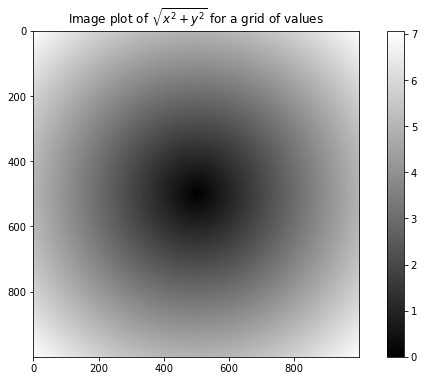

In [8]:
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

In [9]:
plt.draw()

<Figure size 720x432 with 0 Axes>

In [10]:
plt.close('all')

### 4.3.1 삼항식과 어레이

- 163쪽

In [11]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [12]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [13]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [14]:
arr = np.random.randn(4, 4)
arr
arr > 0
np.where(arr > 0, 2, -2)

array([[-2, -2,  2,  2],
       [ 2,  2,  2, -2],
       [-2, -2, -2, -2],
       [ 2, -2,  2, -2]])

In [15]:
np.where(arr > 0, 2, arr) # set only positive values to 2

array([[-1.0212, -0.5771,  2.    ,  2.    ],
       [ 2.    ,  2.    ,  2.    , -0.7135],
       [-0.8312, -2.3702, -1.8608, -0.8608],
       [ 2.    , -1.2659,  2.    , -1.0635]])

### 4.3.2 수학/통계 용도 메서드

- 165쪽

In [16]:
arr = np.random.randn(5, 4)
arr
arr.mean()
np.mean(arr)
arr.sum()

-3.5054904004020653

In [17]:
arr.mean(axis=1)
arr.sum(axis=0)

array([-2.0643, -4.8961,  2.4635,  0.9914])

In [18]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [19]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr
arr.cumsum(axis=0)
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

### 4.3.3 부울 어레이 메서드: `all()`, `any()`

- 167쪽

In [20]:
arr = np.random.randn(100)
(arr > 0).sum() # Number of positive values

49

In [21]:
bools = np.array([False, False, True, False])
bools.any()
bools.all()

False

### 4.3.4 정렬

- 168쪽

In [22]:
arr = np.random.randn(6)
arr
arr.sort()
arr

array([-1.8448, -0.777 , -0.4162, -0.2477, -0.1167,  2.0687])

In [23]:
arr = np.random.randn(5, 3)
arr
arr.sort(1)
arr

array([[-0.1106,  1.2274,  1.4402],
       [ 0.7464,  1.9208,  2.2247],
       [-0.8687, -0.6794,  0.7274],
       [-1.2139, -0.9192, -0.4706],
       [-0.8388, -0.5578,  0.4352]])

In [24]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% quantile

-1.5291806067796911

### 4.3.5 집합 관련 함수

- 169

In [25]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

In [26]:
sorted(set(names))

['Bob', 'Joe', 'Will']

In [27]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

## 배열 파일 저장 및 읽기

- 171쪽

In [28]:
arr = np.arange(10)
np.save('some_array', arr)

np.load('some_array.npy')

np.savez('array_archive.npz', a=arr, b=arr)

arch = np.load('array_archive.npz')
arch['b']

np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

!rm some_array.npy
!rm array_archive.npz
!rm arrays_compressed.npz

## 4.5 선형 대수

- 172쪽

In [29]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x
y
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [30]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [31]:
np.dot(x, np.ones(3))

array([ 6., 15.])

In [32]:
x @ np.ones(3)

array([ 6., 15.])

In [33]:
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
mat = X.T.dot(X)
inv(mat)
mat.dot(inv(mat))
q, r = qr(mat)
r

array([[ -5.1557,   1.8521,   2.1677,   7.7101, -11.0135],
       [  0.    ,  -5.3862,  -0.7103,  -1.9741,  -2.6194],
       [  0.    ,   0.    ,  -2.8978,   0.4238,   0.1073],
       [  0.    ,   0.    ,   0.    ,  -0.6215,   1.2718],
       [  0.    ,   0.    ,   0.    ,   0.    ,   2.1838]])

## 4.6 난수 생성

- 174쪽

In [34]:
samples = np.random.normal(size=(4, 4))
samples

array([[-0.1651, -0.4034, -0.7121,  0.1251],
       [-0.1136, -1.3531, -0.831 ,  0.3652],
       [-0.5447,  0.9779, -0.2564,  0.5108],
       [ 0.7203,  0.3809,  1.0034, -2.3156]])

In [35]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.normal(size=N)

526 ms ± 9.14 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
20.1 ms ± 284 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [36]:
np.random.seed(1234)

In [37]:
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.4714, -1.191 ,  1.4327, -0.3127, -0.7206,  0.8872,  0.8596,
       -0.6365,  0.0157, -2.2427])

## 4.7 예제: 계단 오르기(Random Walks)

- 176쪽

In [38]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

In [39]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

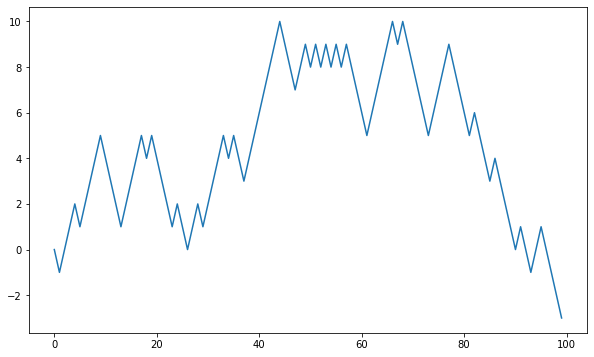

In [40]:
plt.plot(walk[:100])

In [41]:
np.random.seed(12345)

In [42]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

In [43]:
walk.min()
walk.max()

31

In [44]:
(np.abs(walk) >= 10).argmax()

37

### 4.7.1 한 번에 여러 계단 오르기

- 178쪽

In [45]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[  1,   0,   1, ...,   8,   7,   8],
       [  1,   0,  -1, ...,  34,  33,  32],
       [  1,   0,  -1, ...,   4,   5,   4],
       ...,
       [  1,   2,   1, ...,  24,  25,  26],
       [  1,   2,   3, ...,  14,  13,  14],
       [ -1,  -2,  -3, ..., -24, -23, -22]])

In [46]:
walks.max()
walks.min()

-133

In [47]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30
hits30.sum() # Number that hit 30 or -30

3410

In [48]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

498.8897360703812

In [49]:
steps = np.random.normal(loc=0, scale=0.25,
                         size=(nwalks, nsteps))